# First-arrival picking

This notebook performs automated first-arrival picking from the Stryde data at KAUST during the SEG Student Chapter bootcamp on Nov 7 2023. 

The dataset used here has been created by the following workflow: https://github.com/DIG-Kaust/StrydeProjects/blob/main/notebooks/SEGBootcamp_07_11_2023/Visualize_shots.ipynb

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pylops
import matplotlib.pyplot as plt

from refrtomo.picking import *

In [2]:
def fix_traces(d):
    # replace zero traces with closest one (just a hack for this data)
    dfix = d.copy()
    dfix[:, 83] = d[:, 82]
    dfix[:, 85] = d[:, 84]
    return dfix

## Data loading

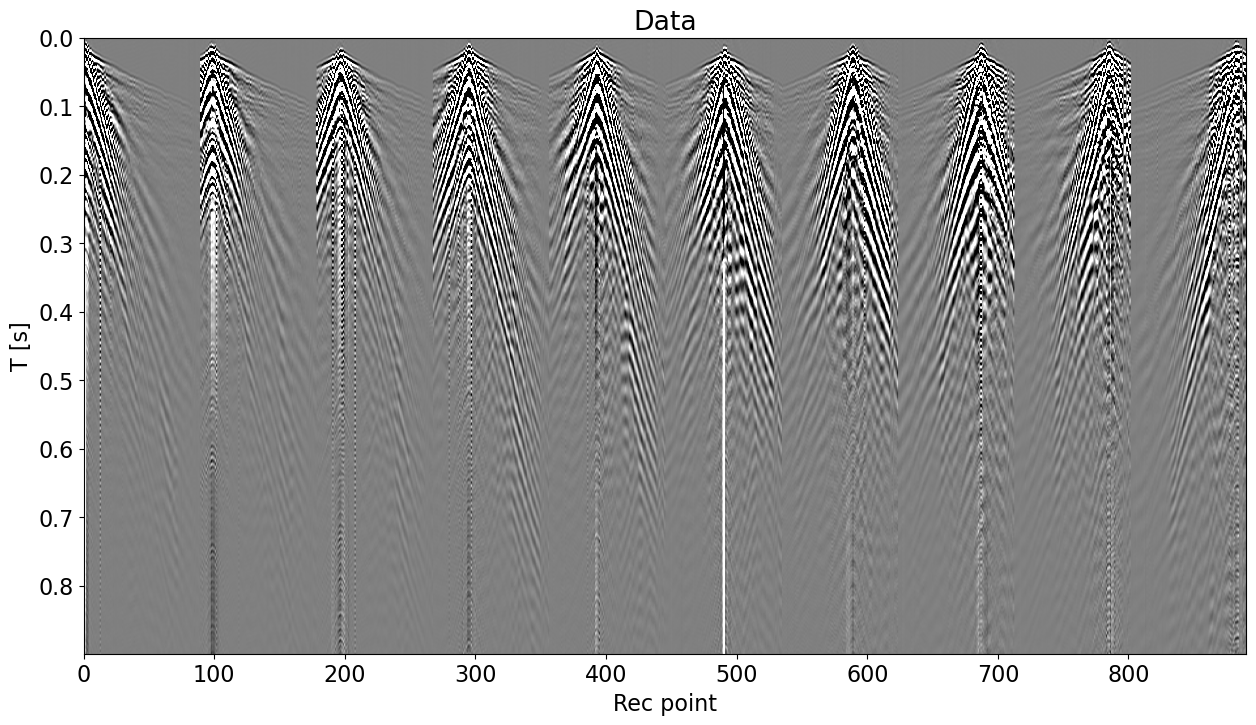

In [3]:
f = np.load('../data/Data_final_SEGbootcamp.npz')
data = f['data']
t = f['t']
x = f['recx']
ns = data.shape[0]
nt = t.size
nr = x.size

xr = f['recx']
xs = np.arange(ns) * 18

plt.figure(figsize=(15, 8))
plt.imshow(data.reshape(-1, nt).T, cmap='gray', vmin=-1e-2, vmax=1e-2, 
           extent=(0, nr*ns, t[-1], t[0]))
plt.axis('tight')
plt.xlabel('Rec point')
plt.ylabel('T [s]')
plt.title('Data');

## Picking for one shot

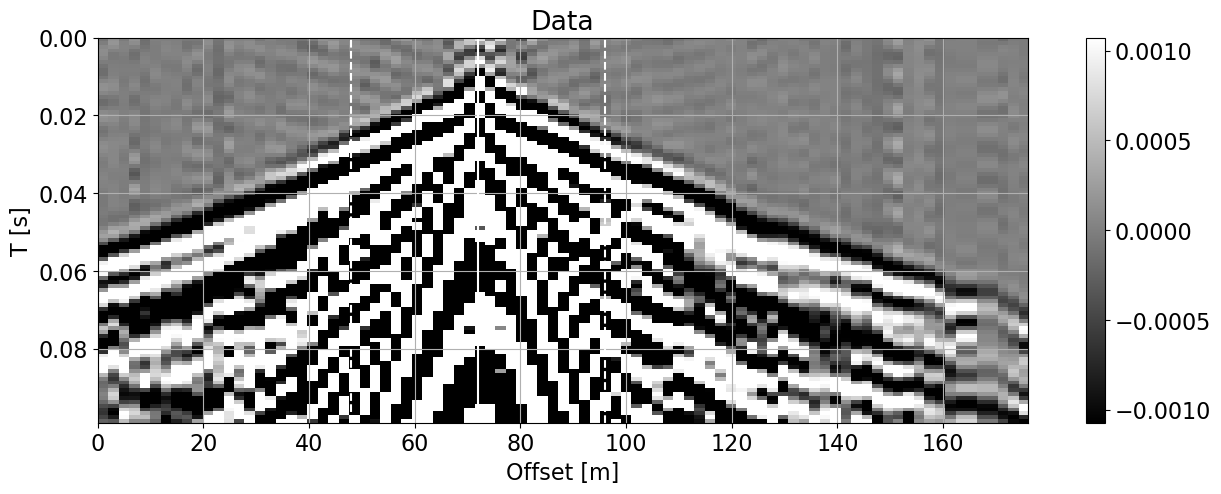

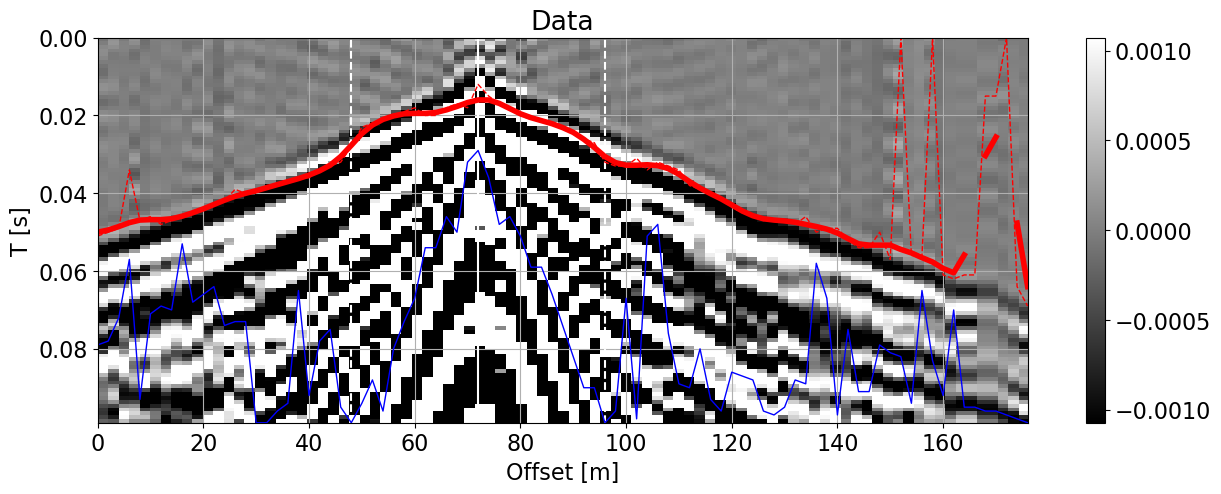

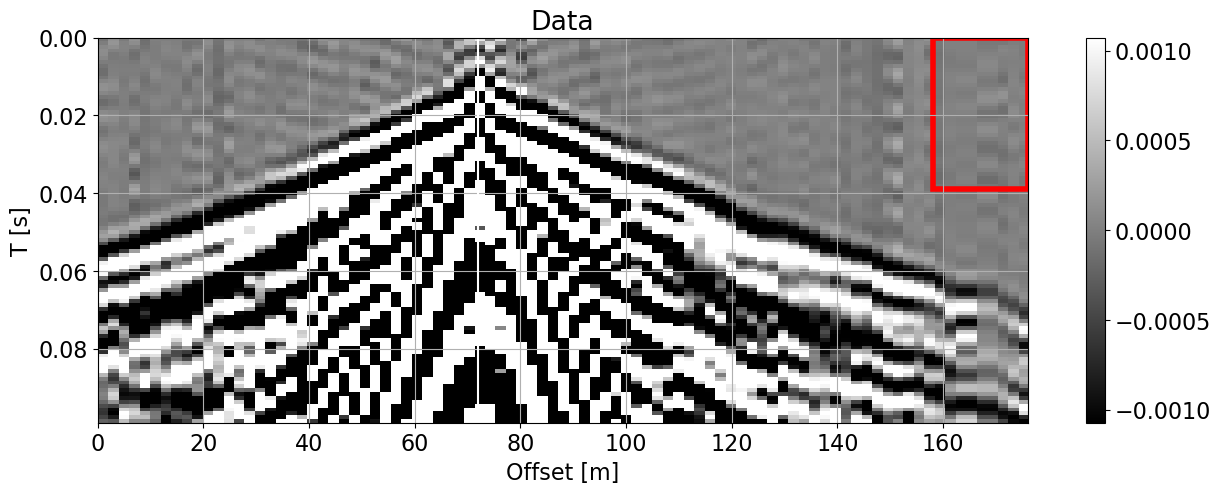

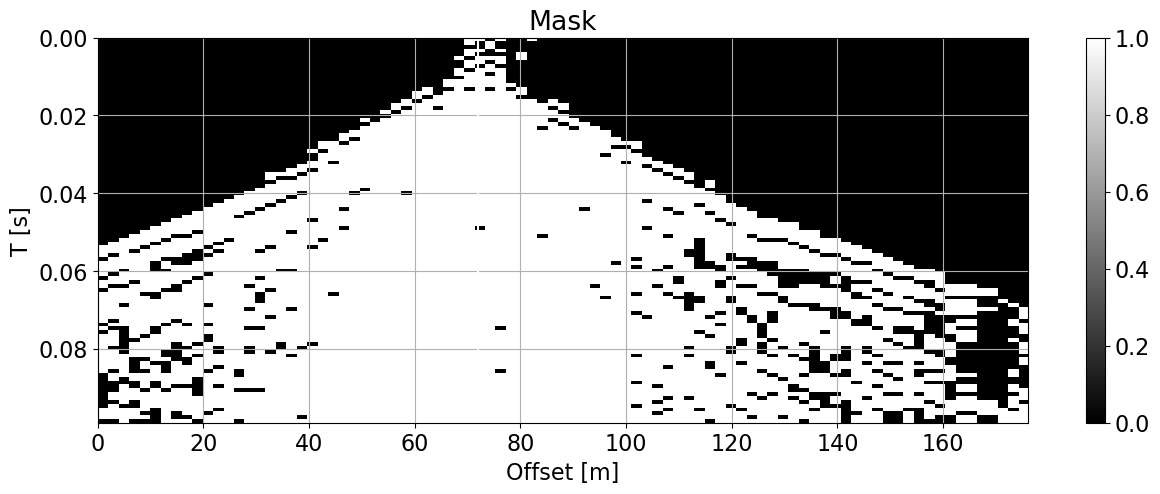

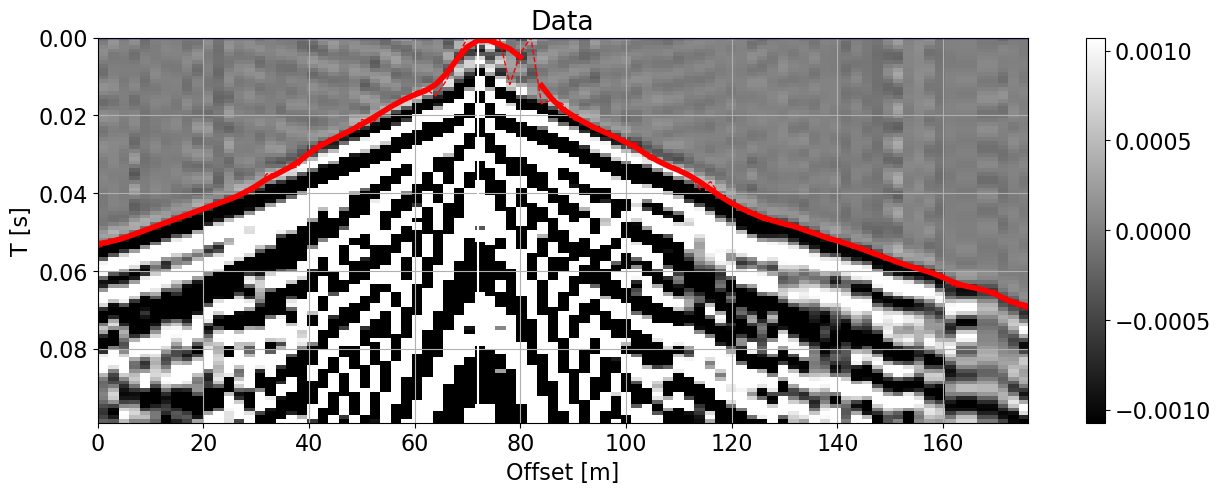

In [4]:
# Shot4
ishot = 4
dfix = fix_traces(data[ishot, :].T)
tfirst = firstarrival_picking(x, t[:100], dfix[:100], ireczeroff=9*ishot, nrecnearoff=12, 
                              threshnear=1e-2, threshfar=1e-1, 
                              nmed=3, nsmooth=3, forcezerooff=True, maxdt=0.01, clip=1e-3)

tfirst = firstarrival_picking1(x, t[:100], dfix[:100], ireczeroff=9*ishot, ntwin=40, nxmin=10, thresh=10,
                               nmed=3, nsmooth=3, forcezerooff=True, maxdt=0.01, clip=1e-3)

## Picking for all shots

/Users/ravasim/Desktop/KAUST/2023/Grants/OFP_DASGeothermal/Codes/RefrTomo/refrtomo/picking.py:163: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))


(10, 89)

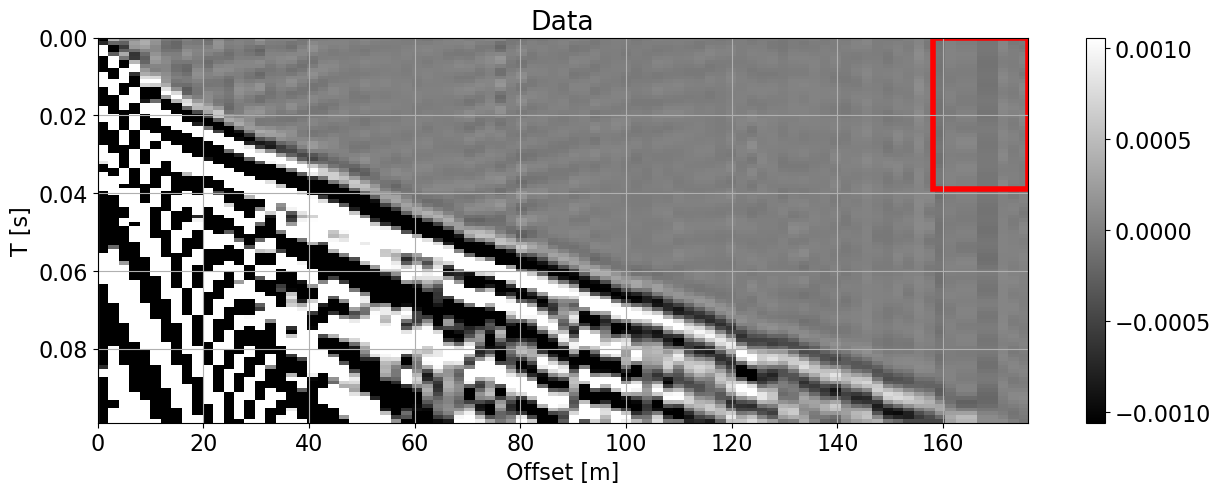

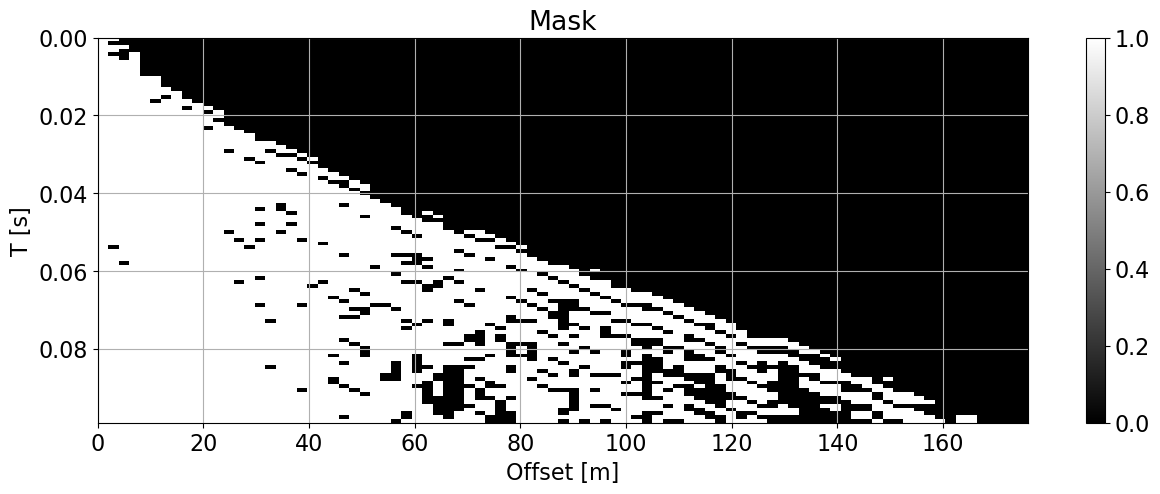

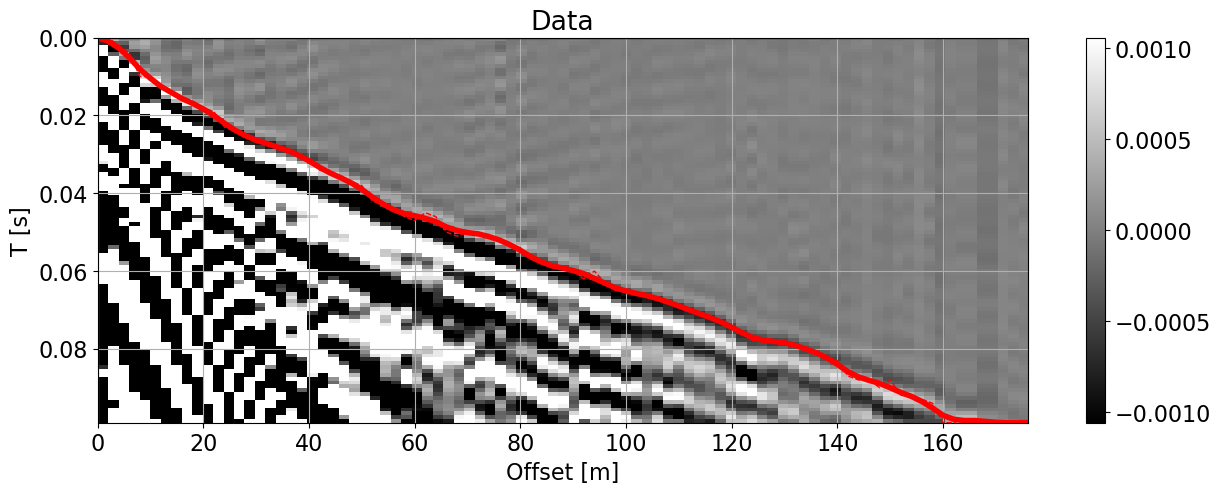

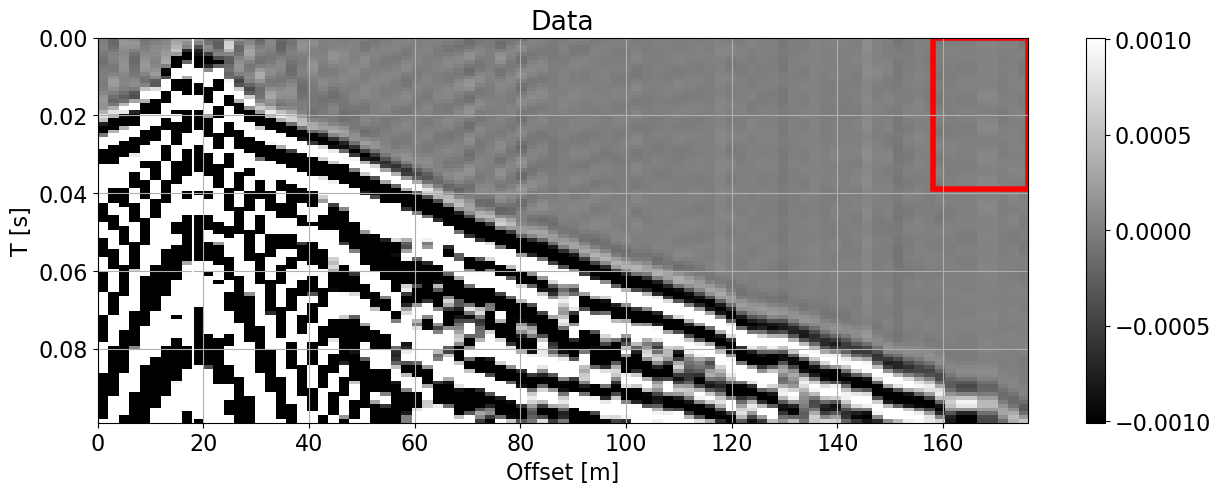

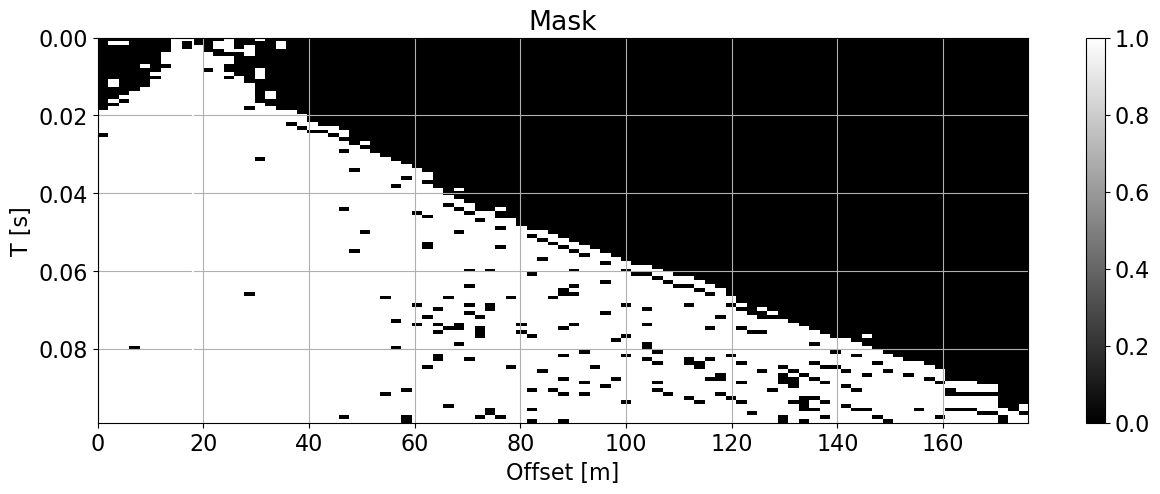

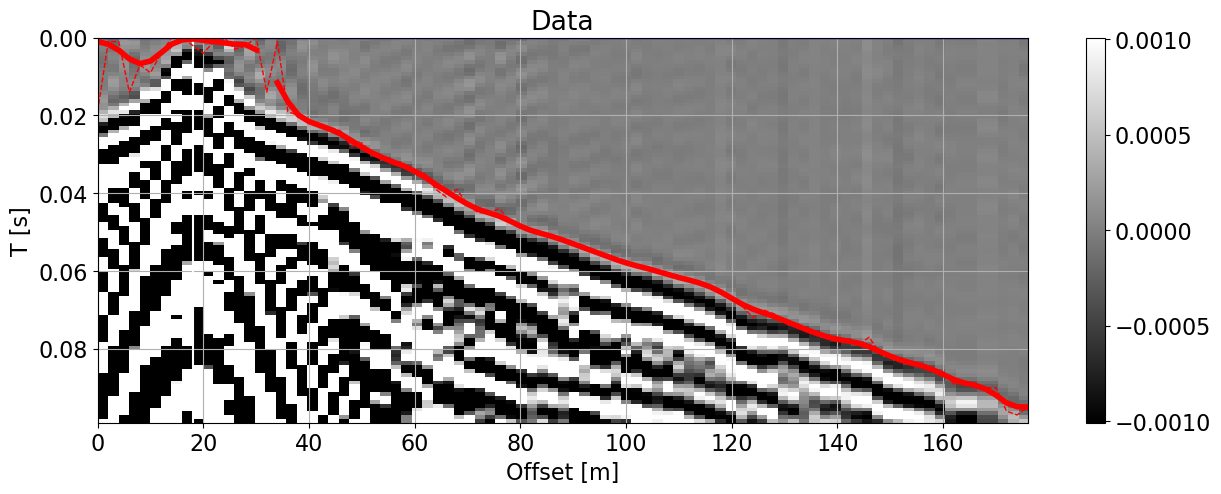

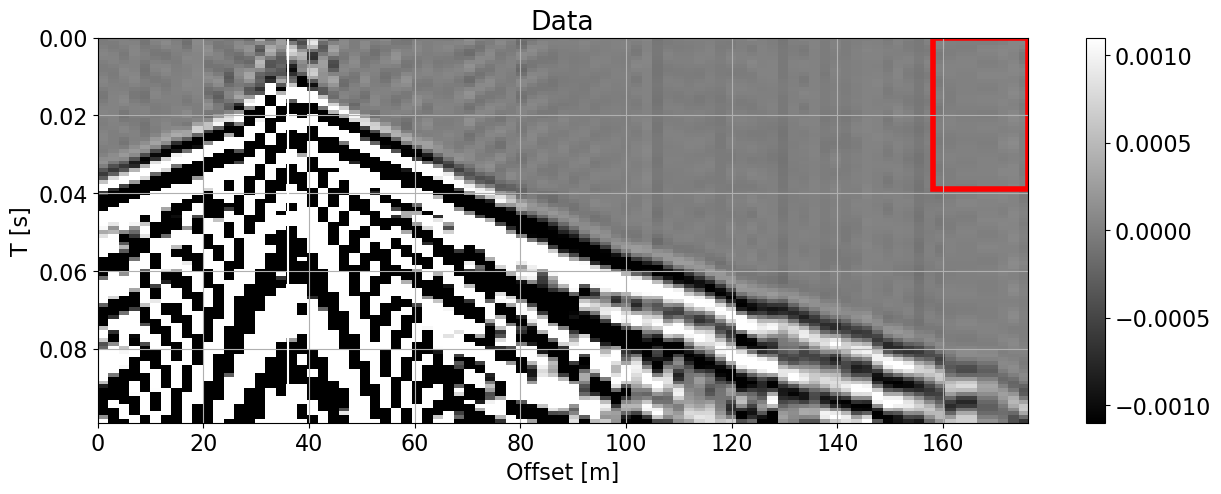

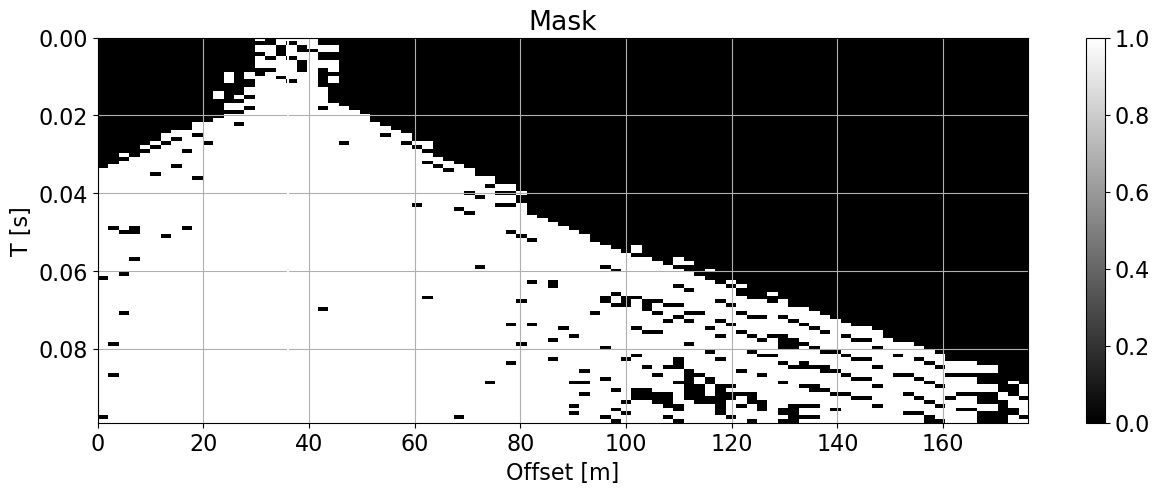

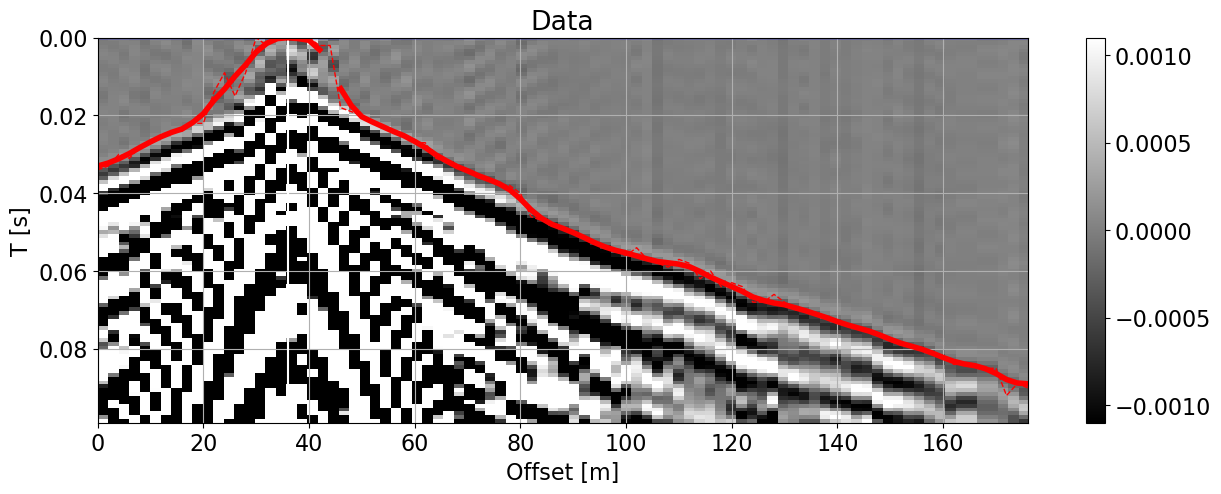

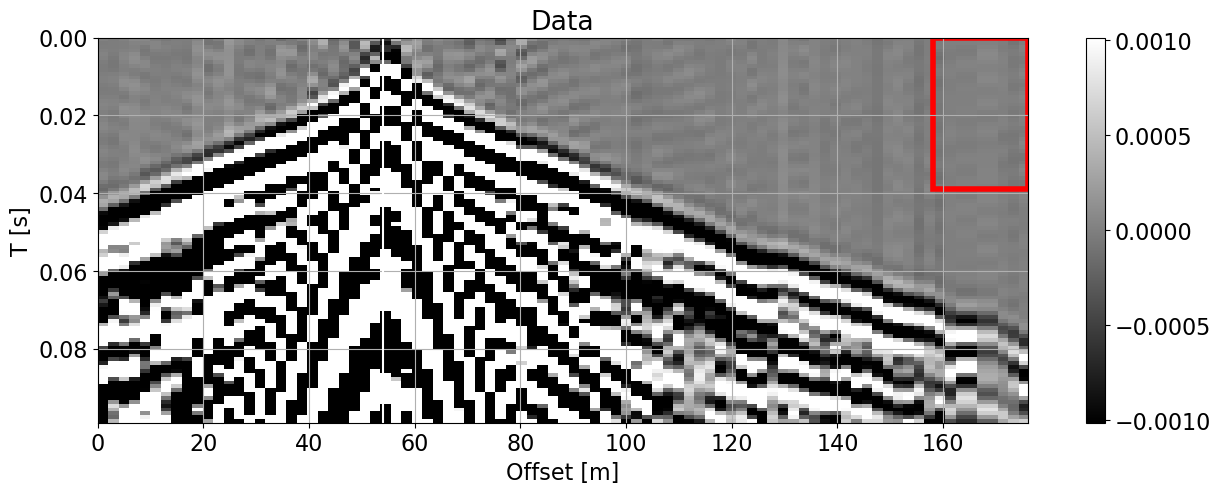

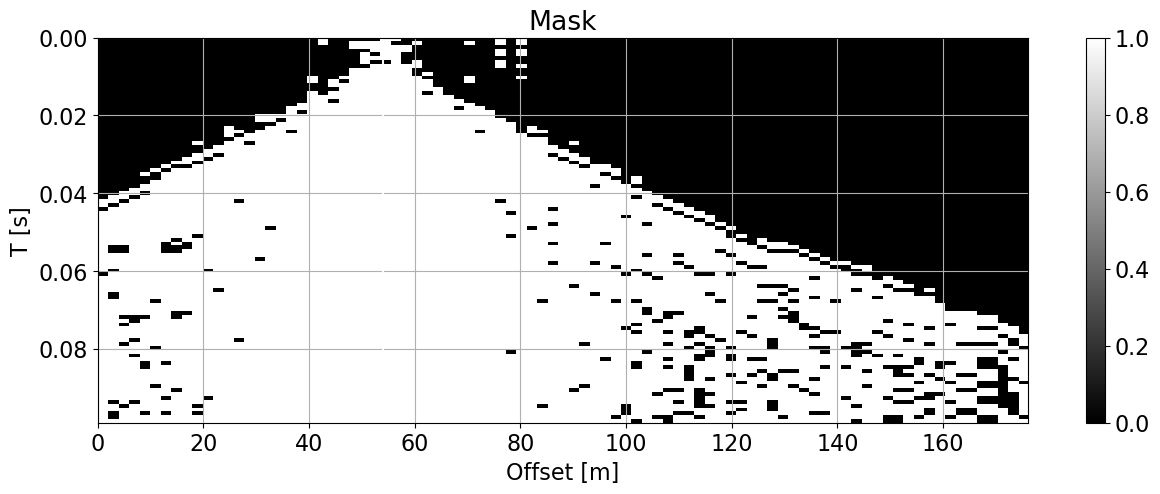

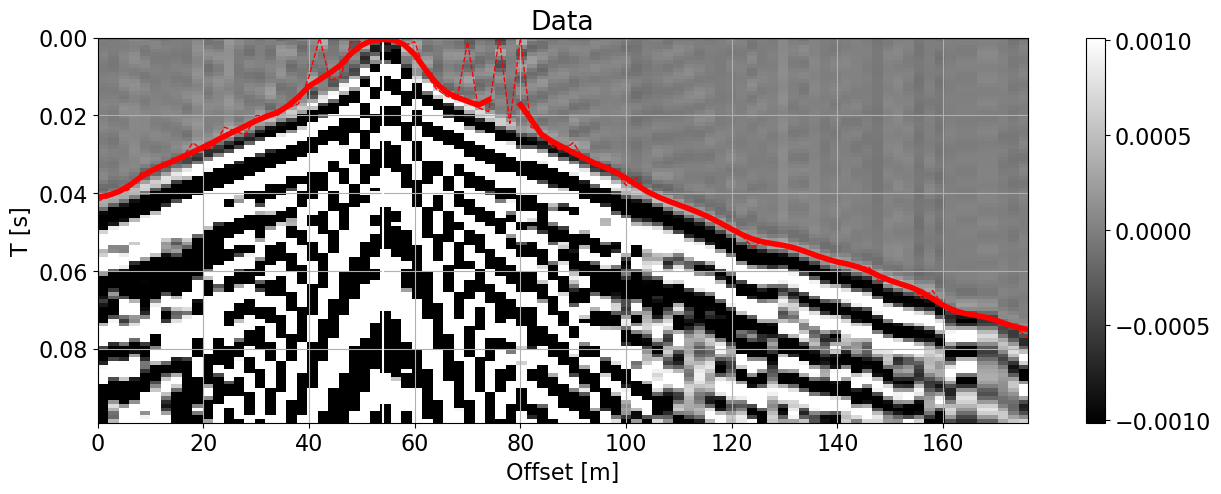

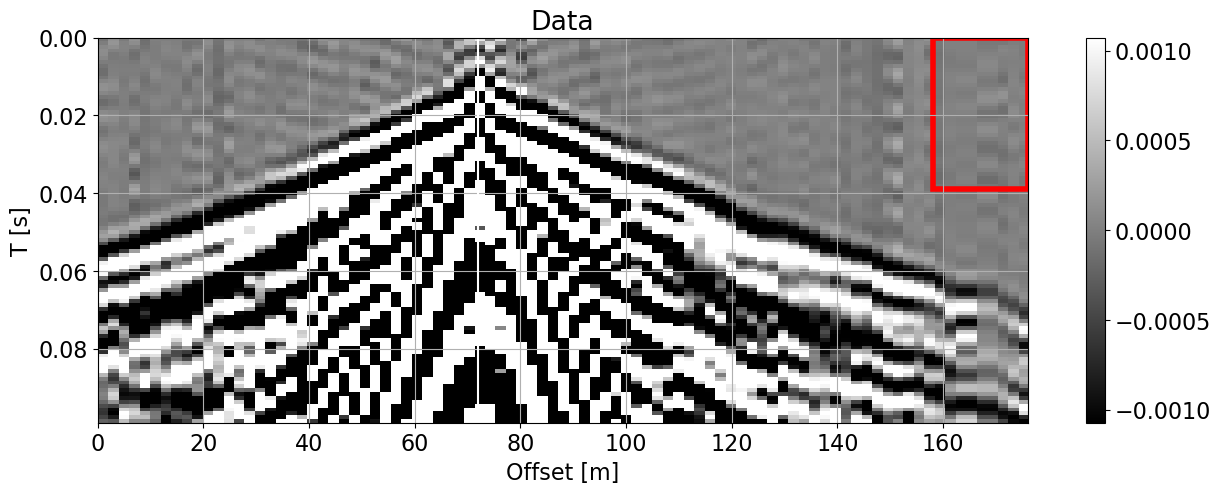

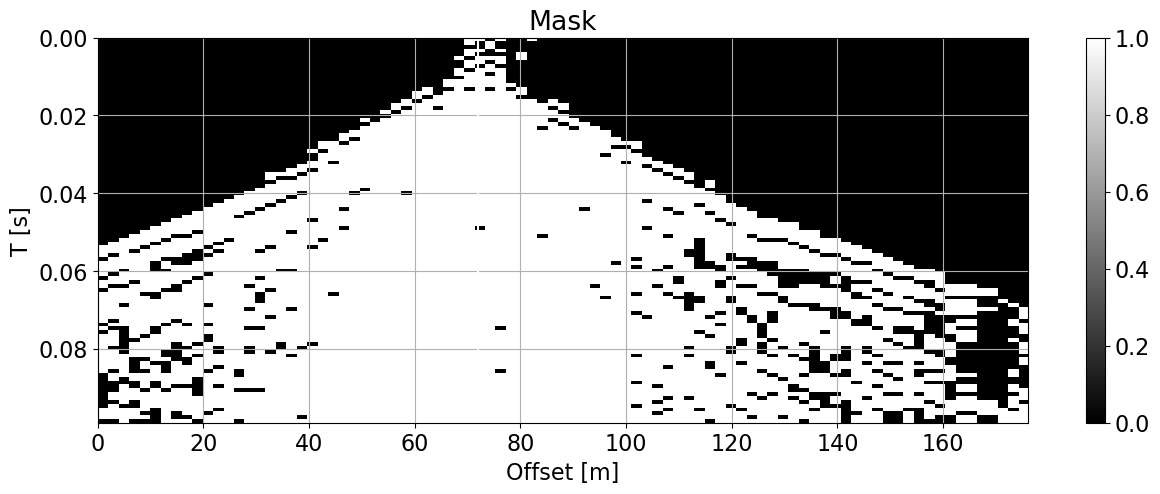

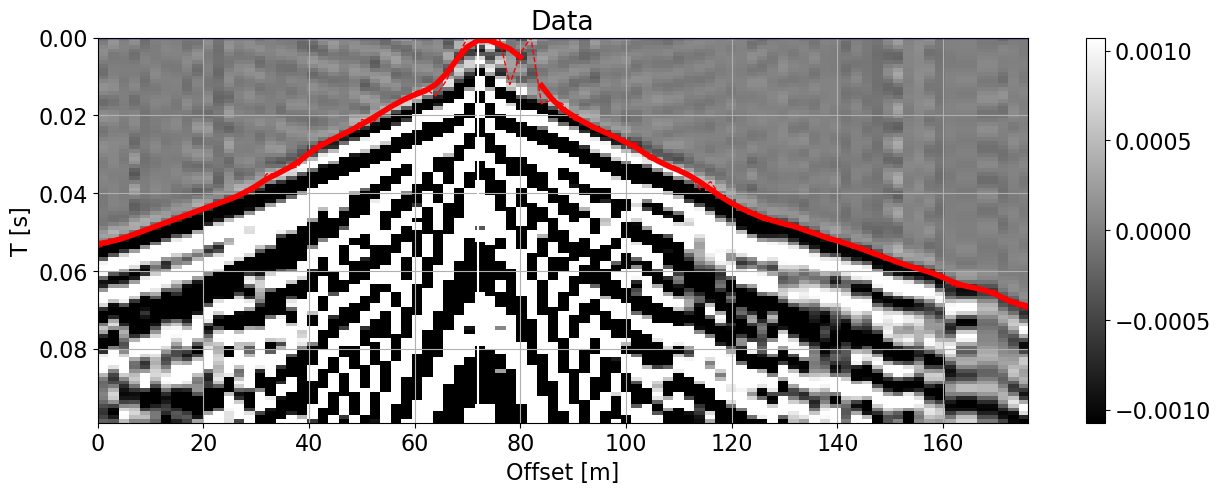

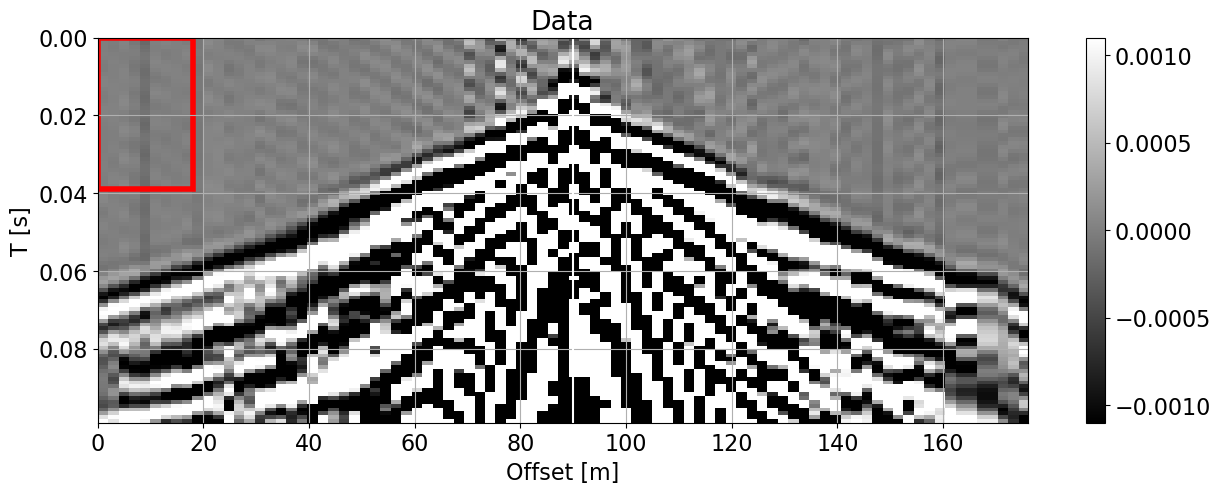

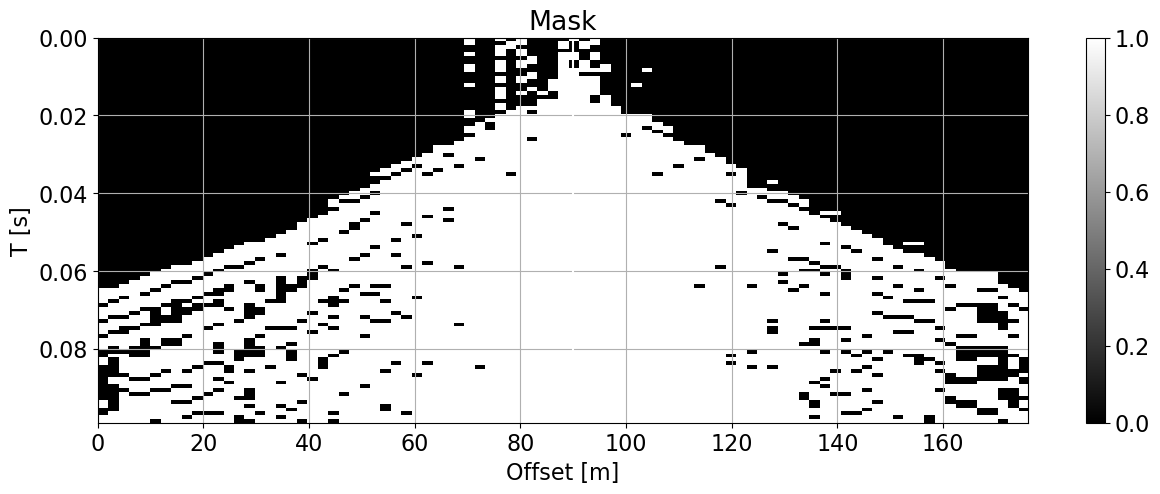

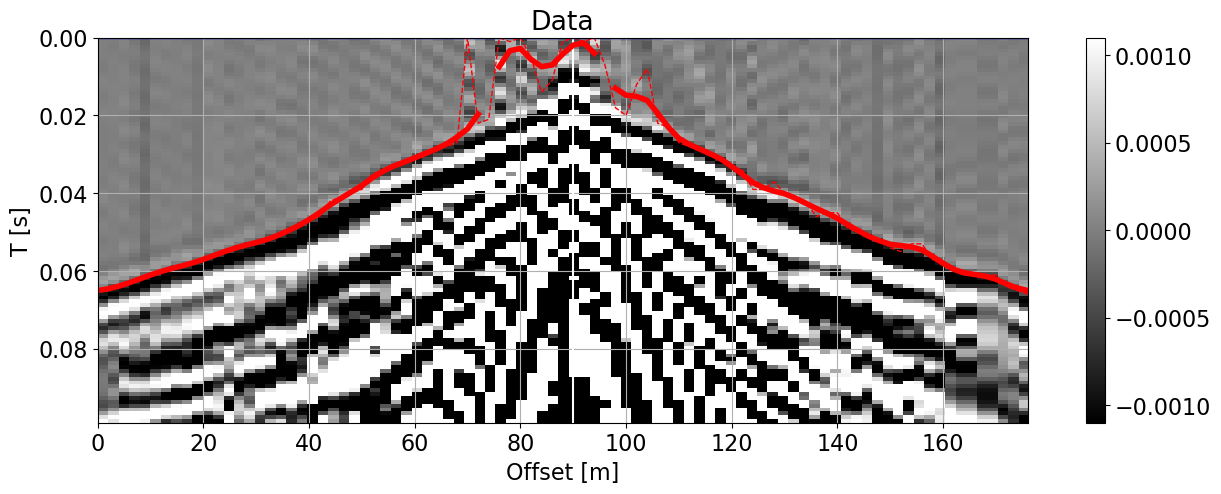

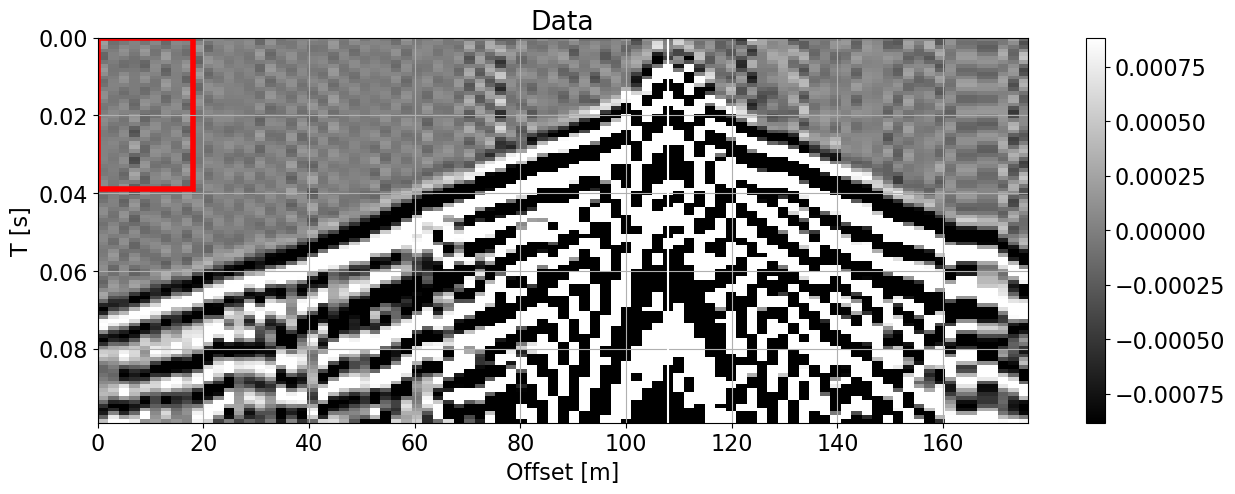

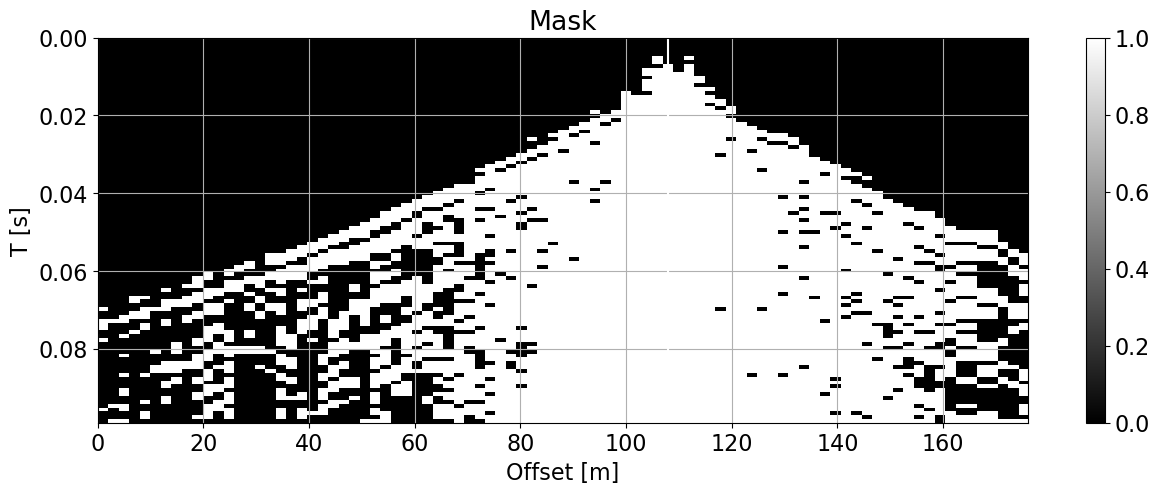

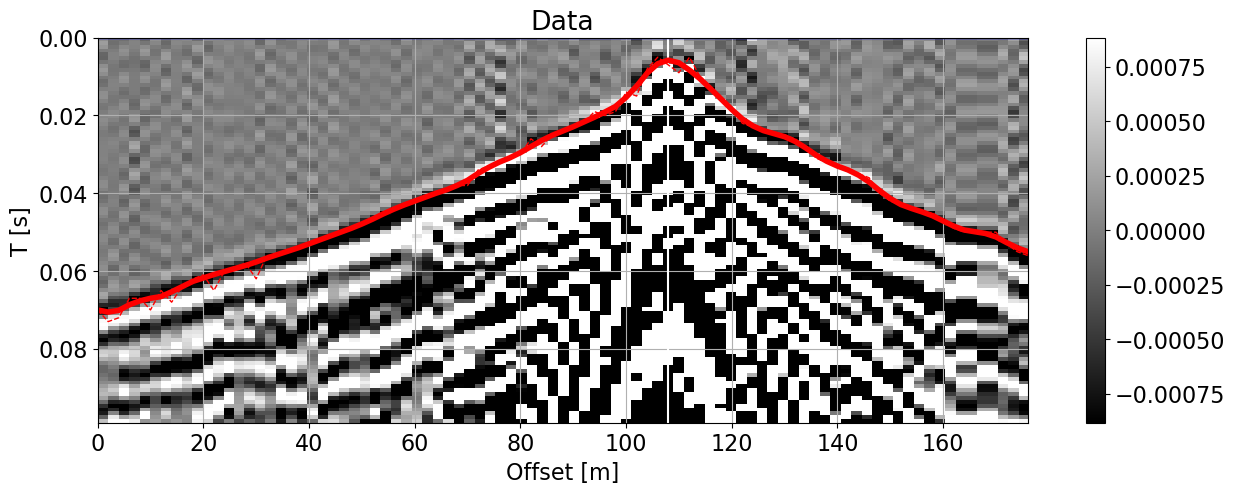

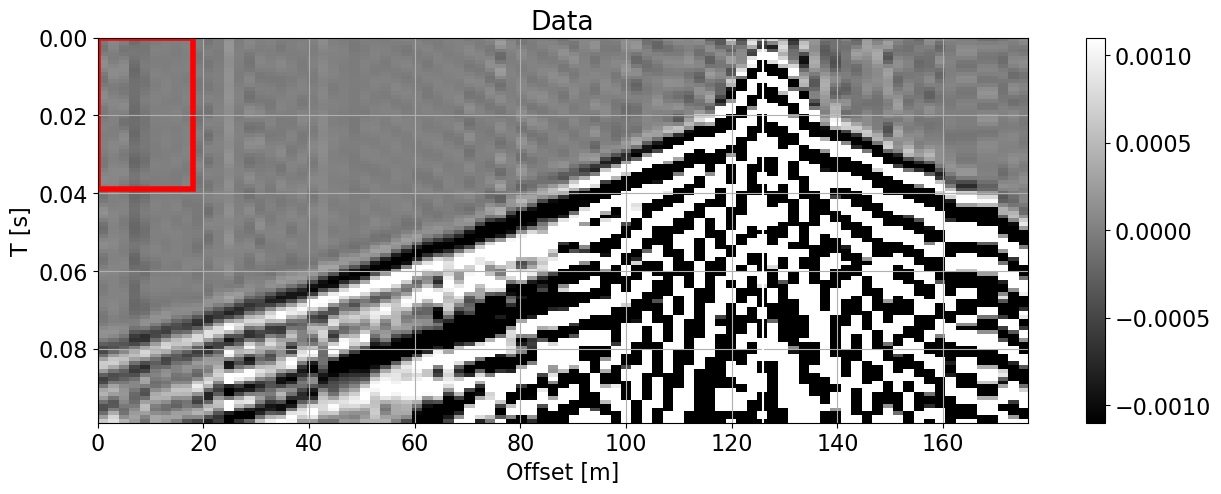

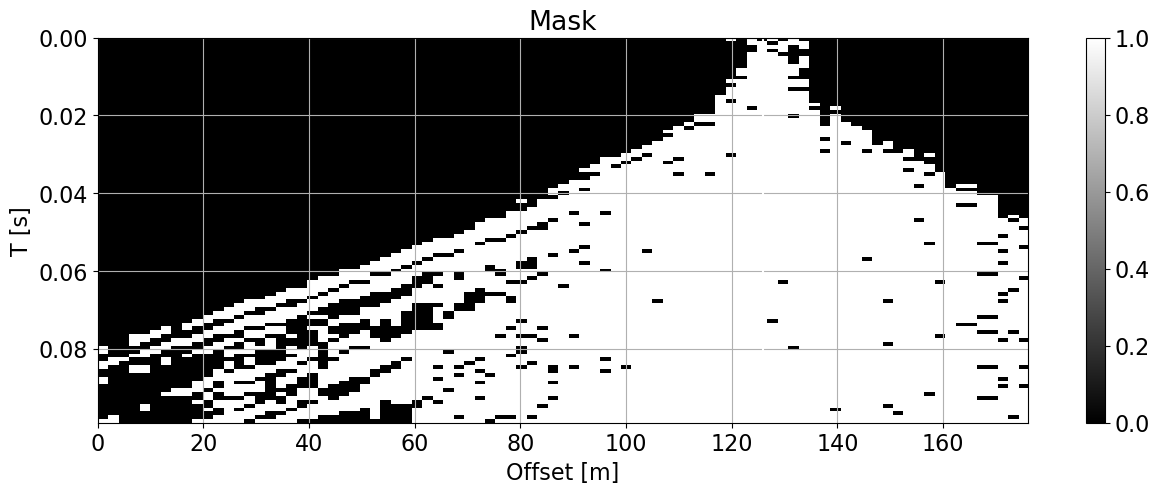

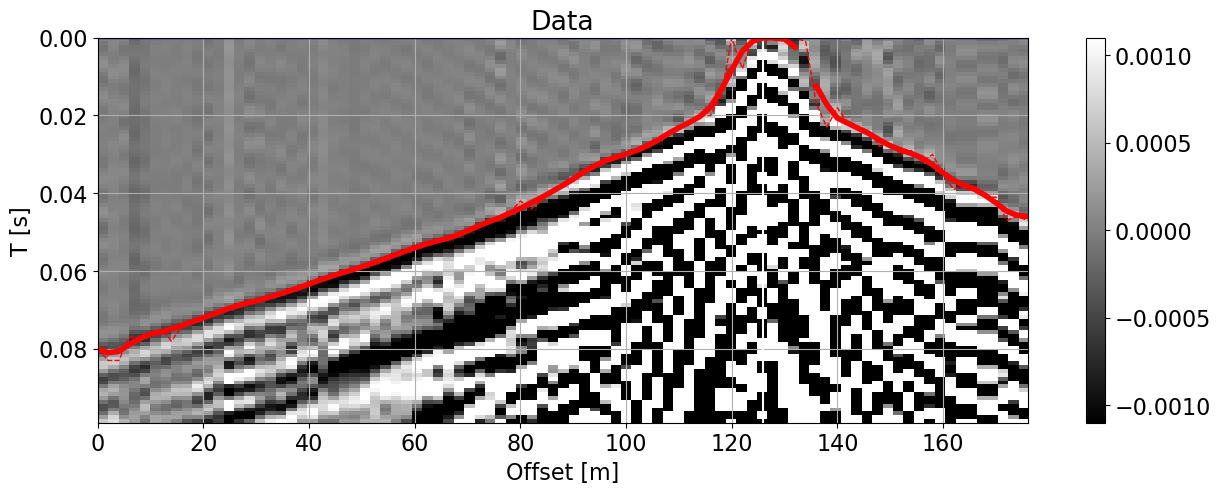

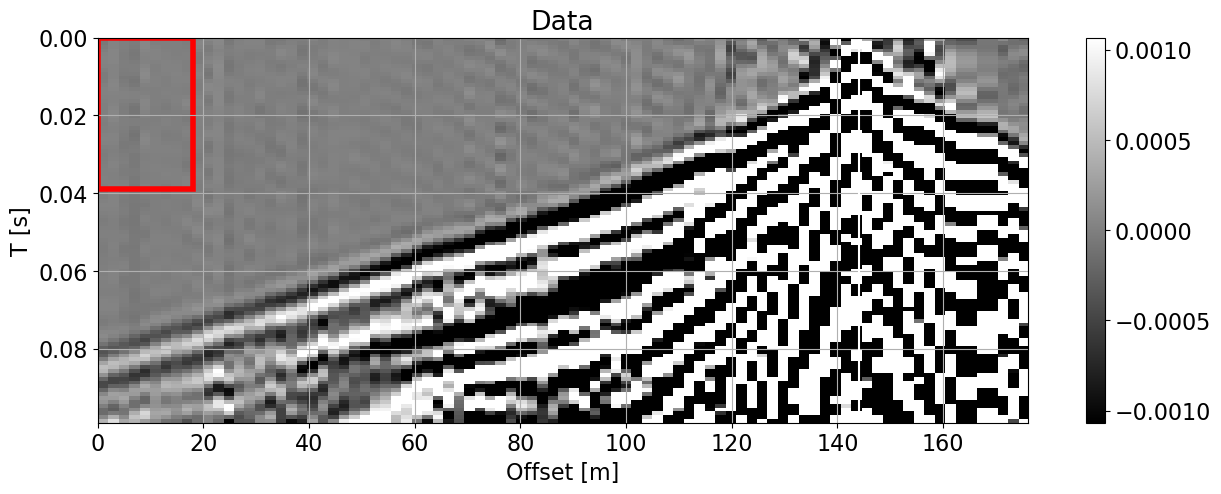

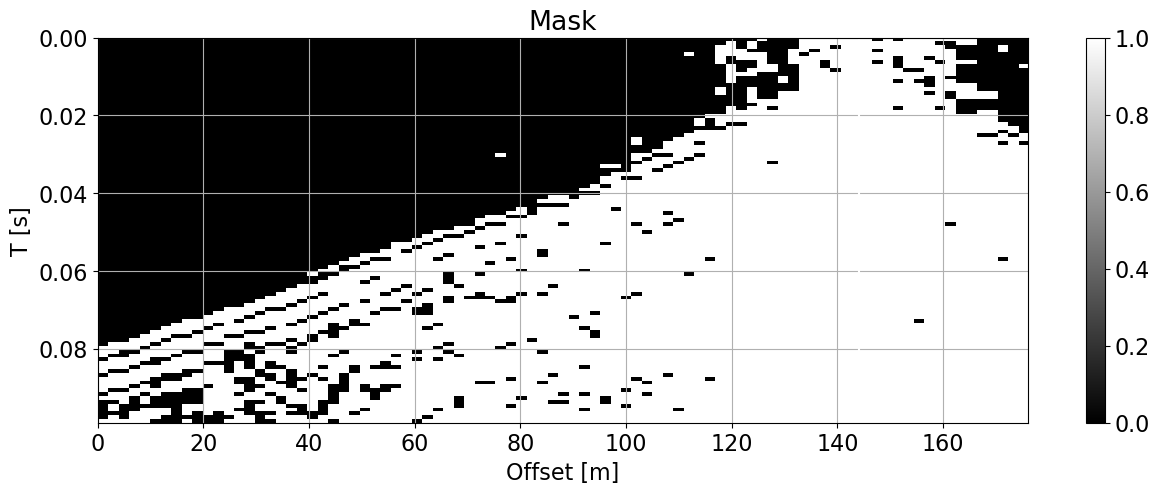

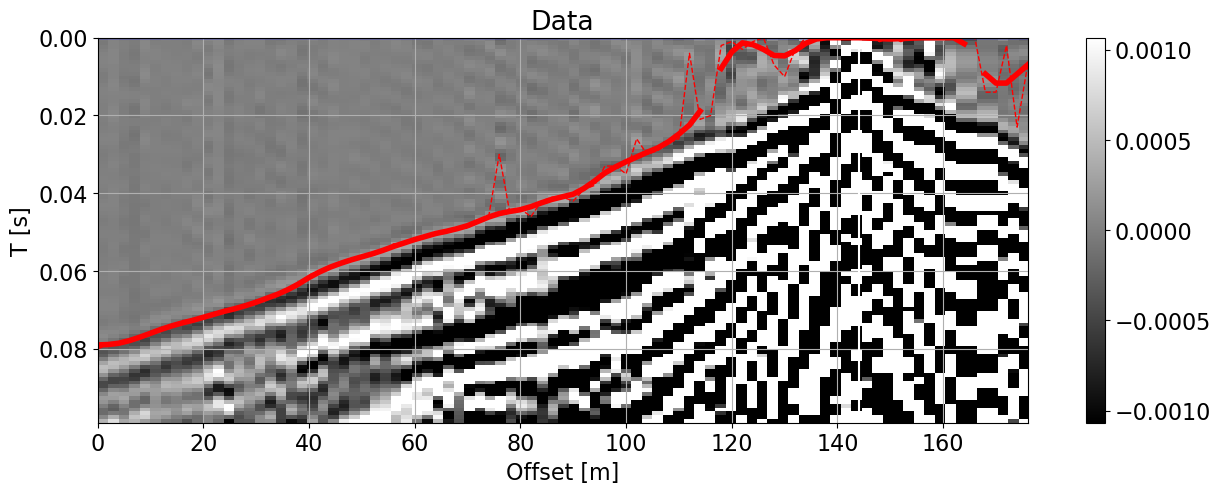

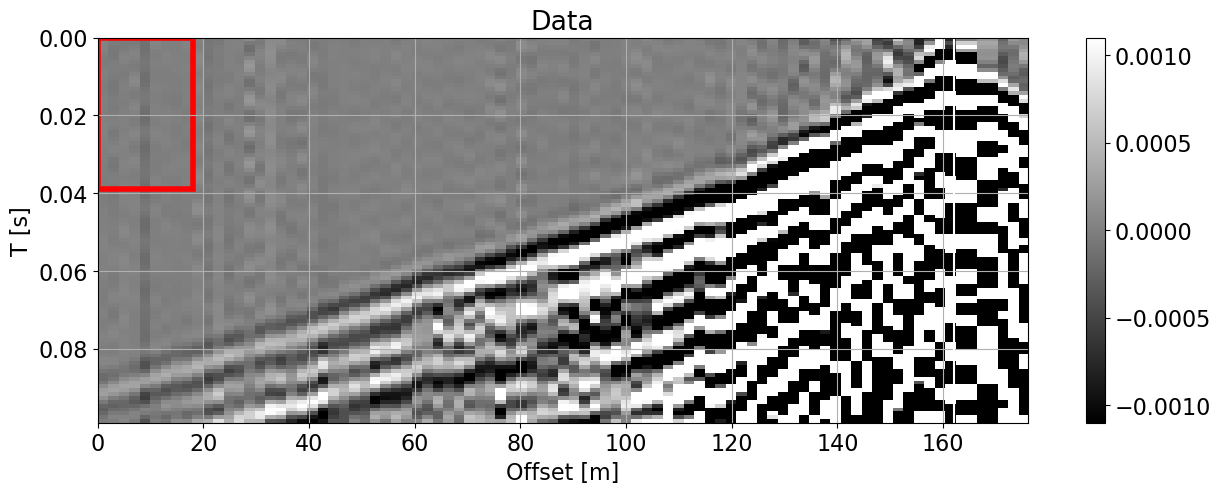

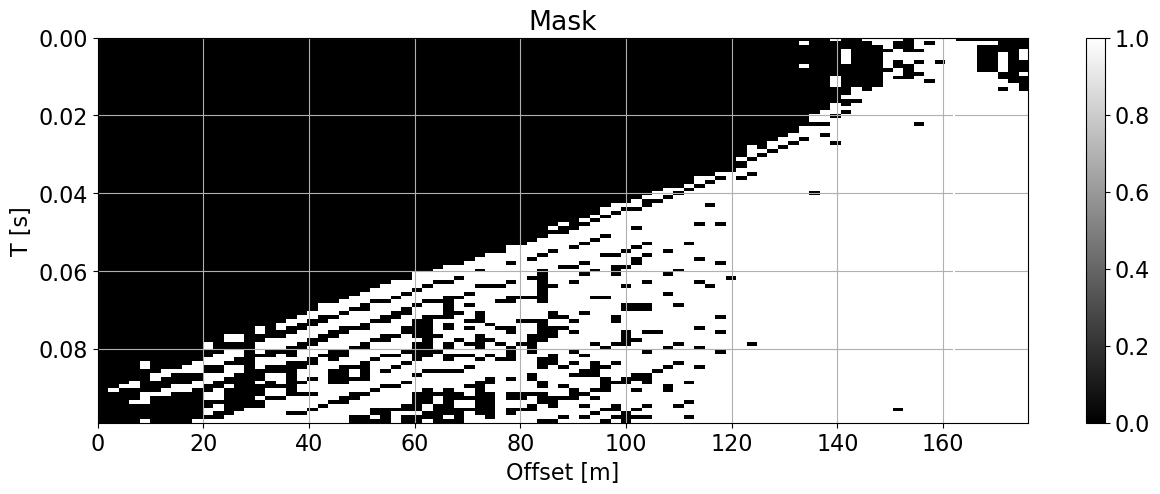

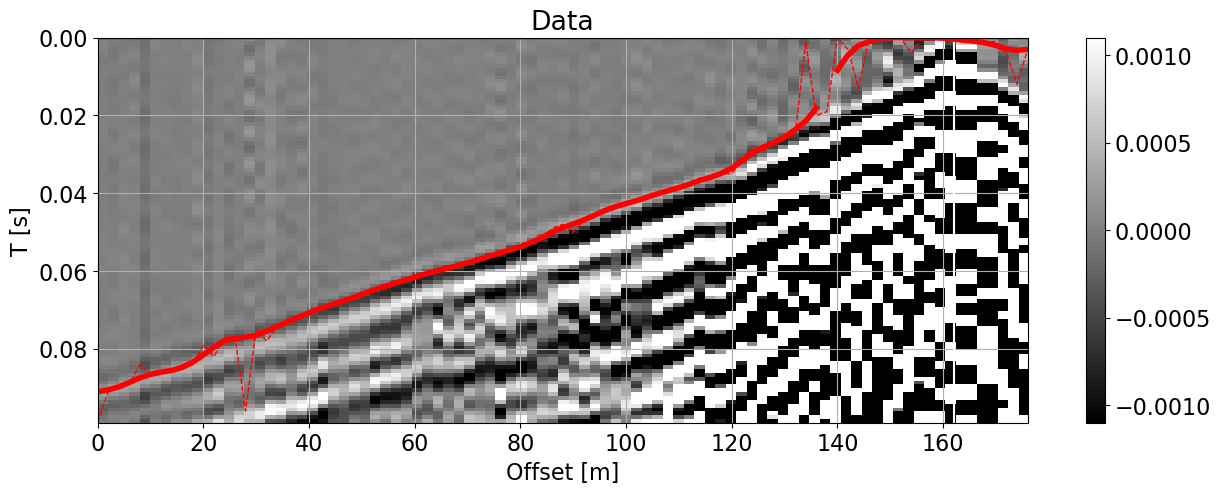

In [5]:
tfirsts = []
for ishot in range(ns):
    dfix = fix_traces(data[ishot, :].T)
    #tfirst = firstarrival_picking(x, t[:100], dfix[:100], ireczeroff=9*ishot, nrecnearoff=18, 
    #                              threshnear=1e-2, threshfar=1e-1, nmed=3, nsmooth=3, 
    #                              forcezerooff=True, maxdt=0.01, clip=1e-3)
    tfirst = firstarrival_picking1(x, t[:100], dfix[:100], ireczeroff=9*ishot, ntwin=40, nxmin=10, thresh=10,
                                   nmed=3, nsmooth=3, forcezerooff=True, maxdt=0.01, clip=1e-3)
    tfirsts.append(tfirst)
tfirsts = np.vstack(tfirsts)
tfirsts.shape

## Display and save

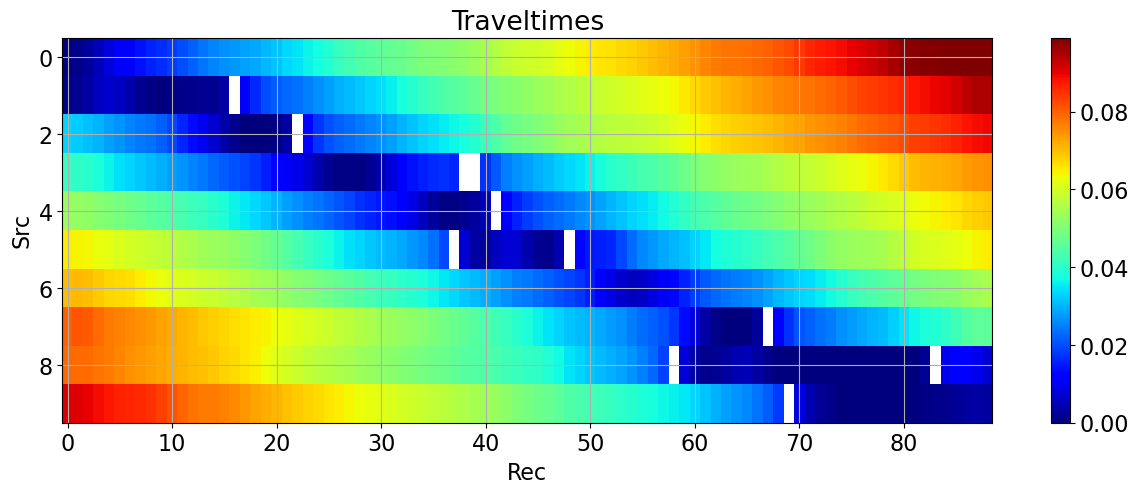

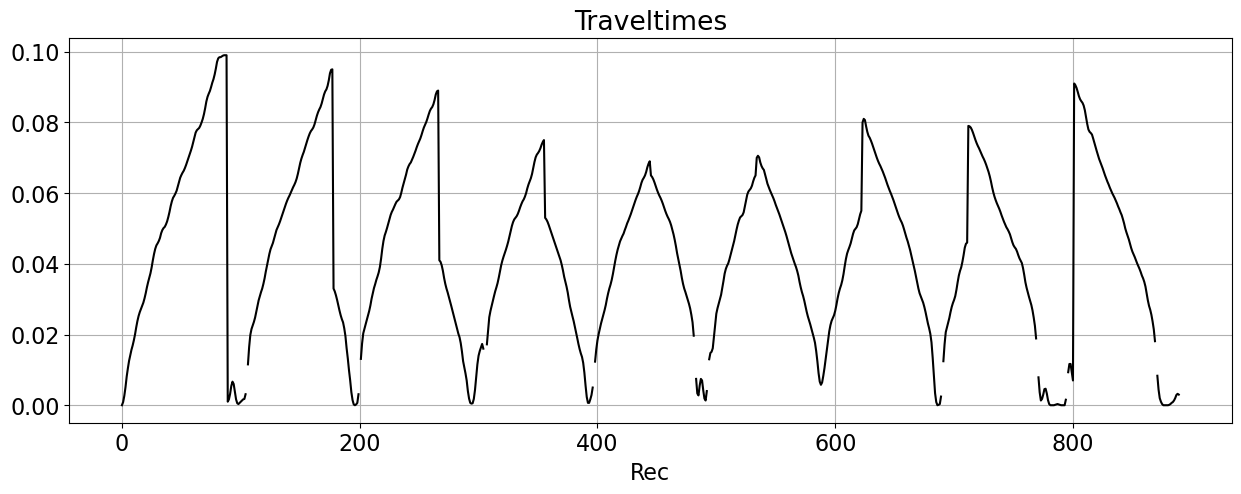

In [6]:
plt.figure(figsize=(15, 5))
plt.imshow(tfirsts, cmap='jet')
plt.axis('tight')
plt.xlabel('Rec')
plt.ylabel('Src')
plt.title('Traveltimes')
plt.grid(which='both')
plt.colorbar();

plt.figure(figsize=(15, 5))
plt.plot(tfirsts.ravel(), 'k')
plt.axis('tight')
plt.xlabel('Rec')
plt.title('Traveltimes')
plt.grid(which='both')

In [7]:
np.savez('../data/FirstArrivalTravStryde', tfirst=tfirsts, xs=xs, xr=xr)